# Introduction to pandas

In [1]:
import pandas as pd
print(pd)

<module 'pandas' from '/usr/local/lib/python3.12/dist-packages/pandas/__init__.py'>


In [18]:
df = pd.DataFrame(
    {
        "Name":[
            "Anicet",
            "Jonhia",
            "AnicetJonhia",
            "JonhiaAnicet",
            "AJ"
        ],
        "Age":[17,18,19,20,1],
        "Sex":["M","M", "F","F","M"]
    }
)

df

,Name,Age,Sex
0,Anicet,17,M
1,Jonhia,18,M
2,AnicetJonhia,19,F
3,JonhiaAnicet,20,F
4,AJ,1,M


In [19]:
df["Age"]

,Age
0,17
1,18
2,19
3,20
4,1


In [20]:
df["Age"][1] # return a np

np.int64(18)

In [21]:
df["Age"][1] = 23
df

/tmp/ipython-input-1656144509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][1] = 23


,Name,Age,Sex
0,Anicet,17,M
1,Jonhia,23,M
2,AnicetJonhia,19,F
3,JonhiaAnicet,20,F
4,AJ,1,M


In [9]:
# let's create a serie from scratch

serie = pd.Series([1,2,3,4])
serie.name="my_serie"
serie

,my_serie
0,1
1,2
2,3
3,4


In [22]:
# let's manipulate a serie or a dataframe

df["Age"].max()

23

In [23]:
# get some statitis of the numerical data of the data table
df.describe()

,Age
count,5.000000
mean,16.000000
std,8.660254
min,1.000000
25%,17.000000
50%,19.000000
75%,20.000000
max,23.000000


#### Remember

Import the package, aka import pandas as pd

A table of data is stored as a pandas DataFrame

Each column in a DataFrame is a Series

You can do things by applying a method to a DataFrame or Series

# Intro to data structures

In [24]:
import numpy as np
import pandas as pd

In [30]:
# Series


# s = pd.Series(data, index=index)
# data can be different thins , index is the a list of axis labels


data = np.random.randn(5)
index = ["a","b","c","d","e"]
s = pd.Series(data, index=index)
s

,0
a,1.860669
b,-1.312462
c,0.031809
d,-0.040008
e,-0.641114


In [31]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [32]:
# instance from dict
d = {"b":1, "c":0}
pd.Series(d)

,0
b,1
c,0


In [33]:
# operation

s.iloc[0]

np.float64(1.8606690694505035)

In [36]:
s.iloc[::2]

,0
a,1.860669
c,0.031809
e,-0.641114


In [37]:
s.iloc[[4,3,1]]

,0
e,-0.641114
d,-0.040008
b,-1.312462


In [38]:
np.exp(s)

,0
a,6.428036
b,0.269157
c,1.032321
d,0.960782
e,0.526705


In [40]:
# from a dict of tuples
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)



a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [57]:
# from a list of namedtuples
from collections import namedtuple



Point = namedtuple("Point", ["x","y"])
df = pd.DataFrame([Point(0,0), Point(0,3), Point(2,3)])
print(df)

Point3D = namedtuple("Point3D","x y z")
df3D = pd.DataFrame([Point3D(0,0,0), Point3D(0,3,0), Point(2,3)])
print(df3D)




   x  y
0  0  0
1  0  3
2  2  3
   x  y    z
0  0  0  0.0
1  0  3  0.0
2  2  3  NaN


In [59]:
# assigning new columns in method chains

iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
# creating a new columns sepal_ratio
iris.assign(sepal_ratio=iris["sepal_width"] / iris["sepal_length"]).head()


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [63]:
# assignation with a function
# let's create petal_ration

iris.assign(petal_ratio=lambda x: x["petal_width"] / x["petal_length"]).head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.142857
1,4.9,3.0,1.4,0.2,setosa,0.142857
2,4.7,3.2,1.3,0.2,setosa,0.153846
3,4.6,3.1,1.5,0.2,setosa,0.133333
4,5.0,3.6,1.4,0.2,setosa,0.142857


<Axes: xlabel='sepal_ratio', ylabel='petal_ratio'>

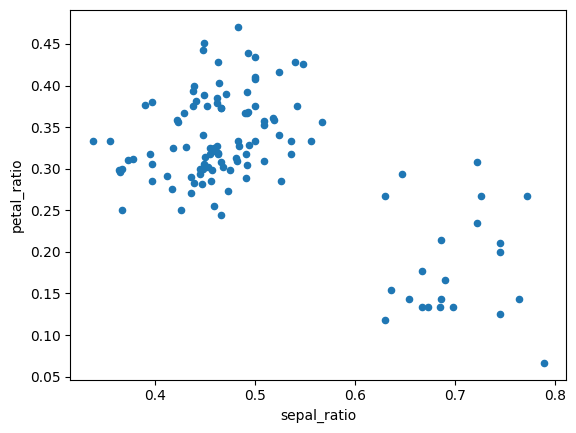

In [71]:
# Query ,  Request

(iris.query("sepal_length > 5")
  .assign(
      sepal_ratio = lambda x: x.sepal_width / x.sepal_length,
      petal_ratio = lambda x: x.petal_width / x.petal_length,
  )
  .plot(kind="scatter", x="sepal_ratio", y="petal_ratio")
)

# Indexing / selection

> select column : df[col]

> select row by label : df.iloc[label]

> select row by integer location : df.iloc[loc]

> slice rows : df[5:10]

> select rows  by boolean vector : df[bool_vec]

In [74]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [75]:
iris.head().to_string()

'   sepal_length  sepal_width  petal_length  petal_width species\n0           5.1          3.5           1.4          0.2  setosa\n1           4.9          3.0           1.4          0.2  setosa\n2           4.7          3.2           1.3          0.2  setosa\n3           4.6          3.1           1.5          0.2  setosa\n4           5.0          3.6           1.4          0.2  setosa'